# MODEL

# Trainig And Testing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

In [3]:
df = pd.read_csv("Dry_Bean_Dataset.csv")

In [4]:
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [5]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Normalising

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [11]:
model = Sequential()

model.add(Dense(80,activation='relu'))
model.add(Dropout(.3))
model.add(Dense(40,activation='relu'))
model.add(Dropout(.3))
model.add(Dense(20,activation='relu'))
model.add(Dropout(.3))
model.add(Dense(10,activation='relu'))
model.add(Dropout(.3))
model.add(Dense(7,activation='softmax'))

model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics='accuracy')

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [14]:
model.fit(x=X_train,y=y_train,epochs=400,validation_data=(X_test,y_test),batch_size=256,callbacks=early_stop)

Epoch 1/400
38/38 [==============================] - 7s 135ms/step - loss: 1.9449 - accuracy: 0.1559 - val_loss: 1.8341 - val_accuracy: 0.2603
Epoch 2/400
38/38 [==============================] - 0s 8ms/step - loss: 1.8276 - accuracy: 0.2461 - val_loss: 1.6183 - val_accuracy: 0.2603
Epoch 3/400
38/38 [==============================] - 0s 9ms/step - loss: 1.6579 - accuracy: 0.2626 - val_loss: 1.4433 - val_accuracy: 0.2919
Epoch 4/400
38/38 [==============================] - 0s 9ms/step - loss: 1.5159 - accuracy: 0.3464 - val_loss: 1.2115 - val_accuracy: 0.5845
Epoch 5/400
38/38 [==============================] - 0s 9ms/step - loss: 1.3489 - accuracy: 0.4595 - val_loss: 0.9853 - val_accuracy: 0.6315
Epoch 6/400
38/38 [==============================] - 0s 8ms/step - loss: 1.1887 - accuracy: 0.5231 - val_loss: 0.8364 - val_accuracy: 0.7057
Epoch 7/400
38/38 [==============================] - 0s 9ms/step - loss: 1.0921 - accuracy: 0.5721 - val_loss: 0.7496 - val_accuracy: 0.7635
Epoch 8/400

38/38 [==============================] - 0s 8ms/step - loss: 0.4528 - accuracy: 0.8544 - val_loss: 0.2698 - val_accuracy: 0.9207
Epoch 116/400
38/38 [==============================] - 0s 9ms/step - loss: 0.4187 - accuracy: 0.8693 - val_loss: 0.2625 - val_accuracy: 0.9209
Epoch 117/400
38/38 [==============================] - 0s 8ms/step - loss: 0.4565 - accuracy: 0.8558 - val_loss: 0.2663 - val_accuracy: 0.9197
Epoch 118/400
38/38 [==============================] - 0s 7ms/step - loss: 0.4535 - accuracy: 0.8594 - val_loss: 0.2661 - val_accuracy: 0.9190
Epoch 119/400
38/38 [==============================] - 0s 8ms/step - loss: 0.4249 - accuracy: 0.8578 - val_loss: 0.2674 - val_accuracy: 0.9170
Epoch 120/400
38/38 [==============================] - 0s 7ms/step - loss: 0.4532 - accuracy: 0.8552 - val_loss: 0.2704 - val_accuracy: 0.9153
Epoch 121/400
38/38 [==============================] - 0s 8ms/step - loss: 0.4433 - accuracy: 0.8587 - val_loss: 0.2651 - val_accuracy: 0.9185
Epoch 122/400

### Model Evaluation

<AxesSubplot:>

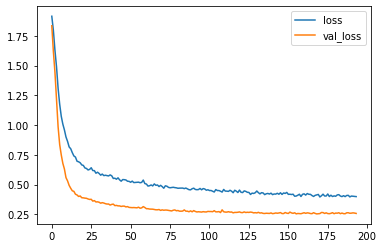

In [15]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [16]:
score = model.evaluate(X_test,y_test,batch_size =256)

16/16 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.9192


In [17]:
print("Accuracy")
score[1]

Accuracy


0.9191968441009521